In [20]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import urllib
import bs4
import pandas
from urllib import request
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model

# Droit des femmes et développement économique

# Importation et traitement de la base de la Banque mondiale

In [22]:
df_bm=pd.read_csv('WDIData.csv')
df_bm.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,16.320475,16.643243,16.994695,17.313168,17.604950,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,32.224027,32.046478,31.323579,33.312163,38.380433,39.754201,42.168241,43.640661,NaN,NaN
2,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,20.525353,19.461383,17.790698,16.553470,23.907897,24.624725,26.813900,28.841150,NaN,NaN
3,Africa Eastern and Southern,AFE,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,66.303599,66.496010,65.828988,66.926692,68.722184,71.085418,71.994933,73.589886,NaN,NaN
4,Africa Eastern and Southern,AFE,Account ownership at a financial institution o...,FX.OWN.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df_bm2=df_bm[["Country Code", "Country Name", "Indicator Name", "Indicator Code", "2019"]]
df_bm2.head(5)

,Country Code,Country Name,Indicator Name,Indicator Code,2019
0,AFE,Africa Eastern and Southern,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN
1,AFE,Africa Eastern and Southern,Access to electricity (% of population),EG.ELC.ACCS.ZS,43.640661
2,AFE,Africa Eastern and Southern,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,28.841150
3,AFE,Africa Eastern and Southern,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,73.589886
4,AFE,Africa Eastern and Southern,Account ownership at a financial institution o...,FX.OWN.TOTL.ZS,NaN


# Importation et traitement de la base de l'OCDE

In [25]:
df_ocde=pd.read_csv('./oecd3.csv', sep=',', encoding='latin-1')
df_ocde.head(5)

,"ï»¿""REGION""",RÃ©gion,LOCATION,Pays,INC,Revenu,VAR,Variable,TIME,AnnÃ©e,Value,Flag Codes,Flags
0,ASI,Asie,AUS,Australie,HIN,ÃlevÃ©,DF_HR_LAW,Loi,2019,2019,0.50,NaN,NaN
1,ASI,Asie,AUS,Australie,HIN,ÃlevÃ©,DF_HR_ATT,Attitudes,2019,2019,21.10,NaN,NaN
2,ASI,Asie,AUS,Australie,HIN,ÃlevÃ©,DF_HR_PRACT,Pratique,2019,2019,1.82,NaN,NaN
3,ASI,Asie,AUS,Australie,HIN,ÃlevÃ©,DF_DV_LAW,Loi,2019,2019,0.00,NaN,NaN
4,ASI,Asie,AUS,Australie,HIN,ÃlevÃ©,DF_IN_LAW,Loi,2019,2019,0.00,NaN,NaN


In [26]:
# on ne sélectionne que les lignes 'pratique' qui correspondent à la réalité des faits 
df_ocde2=df_ocde[df_ocde['Variable']=="Pratique"]
df_ocde2.rename(columns={'ï»¿"REGION"': 'region_monde', 'RÃ©gion': 'region', 'LOCATION': 'Country Code'}, inplace=True)
df_ocde2=df_ocde2[df_ocde2['region_monde']=="ALL"]
df_ocde2.head(5)

C:\Users\gadole\Documents\python\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,region_monde,region,Country Code,Pays,INC,Revenu,VAR,Variable,TIME,AnnÃ©e,Value,Flag Codes,Flags
29,ALL,Toutes les rÃ©gions,AUS,Australie,HIN,ÃlevÃ©,DF_HR_PRACT,Pratique,2019,2019,1.82,NaN,NaN
34,ALL,Toutes les rÃ©gions,AUS,Australie,HIN,ÃlevÃ©,RPI_VAW_PRACT,Pratique,2019,2019,16.90,NaN,NaN
36,ALL,Toutes les rÃ©gions,AUS,Australie,HIN,ÃlevÃ©,RPI_MW_PRACT,Pratique,2019,2019,105.50,NaN,NaN
38,ALL,Toutes les rÃ©gions,AUS,Australie,HIN,ÃlevÃ©,RPI_RA_PRACT,Pratique,2019,2019,11.00,NaN,NaN
42,ALL,Toutes les rÃ©gions,AUS,Australie,HIN,ÃlevÃ©,RAPFR_SAFS_PRACT,Pratique,2019,2019,50.00,NaN,NaN


In [27]:
# on ne sélectionne que les colonnes qui nous intéressent 
df_ocde3=df_ocde2[['Country Code', 'Pays', 'VAR', 'Value']]
df_ocde3.head(5)

,Country Code,Pays,VAR,Value
29,AUS,Australie,DF_HR_PRACT,1.82
34,AUS,Australie,RPI_VAW_PRACT,16.90
36,AUS,Australie,RPI_MW_PRACT,105.50
38,AUS,Australie,RPI_RA_PRACT,11.00
42,AUS,Australie,RAPFR_SAFS_PRACT,50.00


In [28]:
df_ocde3.shape

(3426, 4)

# Création de la base de données

## Indicateur famille (F)

Scrapper le taux de fertilité


## Indicateur santé (S)

Trois variables:
- Espérance de vie à la naissance pour les femmes (BM)
- Part des femmes non-enceintes anémiées (BM)
- Part des femmes séropositives (BM)

In [9]:
df_esperance_de_vie= df_bm2[df_bm2['Indicator Code']=="SP.DYN.LE00.FE.IN"]
df_esperance_de_vie=df_esperance_de_vie[["Country Code", "2019"]]
df_esperance_de_vie.rename(columns={'2019': 'Life expectancy of women at birth'}, inplace=True)
df_esperance_de_vie.head(5)

NameError: name 'df_bm2' is not defined

In [9]:
df_anemia= df_bm2[df_bm2['Indicator Code']=="SH.ANM.NPRG.ZS"]
df_anemia=df_anemia[["Country Code", "2019"]]
df_anemia.rename(columns={'2019': 'Prevalence of anemia among non pregnant women'}, inplace=True)
df_anemia.head(5)

,Country Code,Prevalence of anemia among non pregnant women
1087,AFE,33.432299
2530,AFW,50.511312
3973,ARB,33.212609
5416,CSS,20.080555
6859,CEB,NaN


In [10]:
df_hiv= df_bm2[df_bm2['Indicator Code']=="SH.DYN.AIDS.FE.ZS"]
df_hiv=df_hiv[["Country Code", "2019"]]
df_hiv.rename(columns={'2019': 'Women share of population living with HIV'}, inplace=True)
df_hiv.head(5)

,Country Code,Women share of population living with HIV
1441,AFE,60.062444
2884,AFW,61.990050
4327,ARB,40.461413
5770,CSS,49.739577
7213,CEB,NaN


In [42]:
# On fusionne tout ça dans le df santé
df_sante=df_esperance_de_vie.merge(df_anemia, on='Country Code', how='left')
df_sante=df_sante.merge(df_hiv, on='Country Code', how='outer')
df_sante

,Country Code,Life expectancy of women at birth,Prevalence of anemia among non pregnant women,Women share of population living with HIV
0,AFE,66.202116,33.432299,60.062444
1,AFW,59.231072,50.511312,61.990050
2,ARB,73.832314,33.212609,40.461413
3,CSS,76.032605,20.080555,49.739577
4,CEB,80.833612,NaN,NaN
...,...,...,...,...
261,VIR,83.100000,NaN,NaN
262,PSE,75.755000,NaN,NaN
263,YEM,67.826000,61.800000,37.300000
264,ZMB,66.891000,30.700000,61.500000


## Indicateur ressources économiques (RE)

Trois variables:
- part des femmes proprétaires d'un compte en banque (OCDE)
- partage des tâches domestiques (OCDE)
- variable pour mesurer les écarts de salaire avec les hommes 

In [12]:
df_domestique=df_ocde3[df_ocde3['VAR']=="DF_HR_PRACT"]
df_domestique=df_domestique[['Country Code', "Value"]]
df_domestique.rename(columns={'Value': 'Domestic time ratio women on men'}, inplace=True)
df_domestique.head(5)

,Country Code,Domestic time ratio women on men
29,AUS,1.82
83,AUT,1.95
137,BEL,1.55
192,CAN,1.51
299,DNK,1.39


In [13]:
df_banque=df_ocde3[df_ocde3['VAR']=="RAPFR_SAFS_PRACT"]
df_banque=df_banque[['Country Code', "Value"]]
df_banque.rename(columns={'Value': 'Women s share amoung bank account owners'}, inplace=True)
df_banque.head(5)

,Country Code,Women s share amoung bank account owners
42,AUS,50.0
97,AUT,51.1
151,BEL,50.8
206,CAN,50.4
259,CZE,47.8


In [55]:
# On fusionne tout ça dans le df ressources économiques
df_ressources_eco=df_domestique.merge(df_banque, on='Country Code', how='outer')
df_ressources_eco = df_ressources_eco.drop_duplicates()
df_ressources_eco

,Country Code,Domestic time ratio women on men,Women s share amoung bank account owners
0,AUS,1.82,50.0
4,AUT,1.95,51.1
8,BEL,1.55,50.8
12,CAN,1.51,50.4
16,DNK,1.39,50.3
...,...,...,...
498,SOM,NaN,38.7
500,TJK,NaN,44.5
502,TGO,NaN,42.1
504,YEM,NaN,12.6


## Indicateur éducation (E)

4 variables : 
- Adolescents out of school, female (% of female lower secondary school age) (BM)
- Adjusted net enrollment rate, primary, female (% of primary school age children) (à comparer avec les hommes) (BM)
- Educational attainment, at least completed lower secondary, population 25+, female (%) (cumulative) (à comparer avec les hommes) (BM)
- Educational attainment, at least completed short-cycle tertiary, population 25+, female (%) (cumulative) (à comparer avec les hommes) (BM)

In [30]:
df_descolariation = df_bm2[df_bm2['Indicator Code']=="SE.SEC.UNER.LO.FE.ZS"]
df_descolariation = df_descolariation[["Country Code", "2019"]]
df_descolariation.rename(columns={'2019': 'Adolescents s share out of school, female' }, inplace=True)
df_descolariation.head(5)

,Country Code,"Adolescents s share out of school, female"
50,AFE,NaN
1493,AFW,NaN
2936,ARB,18.380989
4379,CSS,11.200680
5822,CEB,5.755160


In [ ]:
df_scolariation_primaire = 

In [29]:
df_education_basique = df_bm2[df_bm2['Indicator Code']=="SE.SEC.CUAT.LO.FE.ZS"]
df_education_basique = df_education_basique[["Country Code", "2019"]]
df_education_basique.rename(columns={'2019': 'Women of 25+ who completed lower secondary'}, inplace=True)
df_education_basique.head(5)

,Country Code,Women of 25+ who completed lower secondary
324,AFE,NaN
1767,AFW,NaN
3210,ARB,NaN
4653,CSS,NaN
6096,CEB,NaN


In [31]:
df_etude_sup = df_bm2[df_bm2['Indicator Code']=="SE.TER.CUAT.ST.FE.ZS"]
df_etude_sup = df_etude_sup[["Country Code", "2019"]]
df_etude_sup.rename(columns={'2019': 'Women of 25+ who completed short-cycle tertiary'}, inplace=True)
df_etude_sup.head(5)

,Country Code,Women of 25+ who completed short-cycle tertiary
333,AFE,NaN
1776,AFW,NaN
3219,ARB,NaN
4662,CSS,NaN
6105,CEB,NaN


## Indicateur autonomie du corps (AC)

In [13]:
df_contraception=df_ocde3[df_ocde3['VAR']=="RPI_RA_PRACT"]
df_contraception=df_contraception[['Country Code', "Value"]]
df_contraception.rename(columns={'Value': 'No contraception used without wanting having children'}, inplace=True)
df_contraception.head(5)

,Country Code,No contraception used without wanting having children
38,AUS,11.0
92,AUT,10.0
146,BEL,7.0
201,CAN,7.0
254,CZE,4.3


In [62]:
df_violences=df_ocde3[df_ocde3['VAR']=="RPI_VAW_PRACT"]
df_violences=df_violences[['Country Code', "Value"]]
df_violences.rename(columns={'Value': 'Physical and sexual violences on women'}, inplace=True)
df_violences.head(5)

,Country Code,Physical and sexual violences on women
34,AUS,16.9
88,AUT,13.0
142,BEL,24.0
197,CAN,1.9
250,CZE,21.0


In [17]:
# Provient de la banque mondiale 2018 
df_bm3=df_bm[["Country Code", "Country Name", "Indicator Name", "Indicator Code", "2018"]]

df_homicide= df_bm3[df_bm3['Indicator Code']=="VC.IHR.PSRC.FE.P5"]
df_homicide=df_homicide[["Country Code", "2018"]]
df_homicide.rename(columns={'2018': 'Intentional homicides per 100,000 female'}, inplace=True)
df_homicide.head(5)

,Country Code,"Intentional homicides per 100,000 female"
634,AFE,NaN
2077,AFW,NaN
3520,ARB,NaN
4963,CSS,NaN
6406,CEB,NaN


In [57]:
# On fusionne tout ça dans le df autonomie du corps
df_autonomie_corps=df_contraception.merge(df_violences, on='Country Code', how='outer')
df_autonomie_corps=df_autonomie_corps.merge(df_homicide, on='Country Code', how='outer')
df_autonomie_corps = df_autonomie_corps.drop_duplicates()
df_autonomie_corps

,Country Code,No contraception used without wanting having children,Physical and sexual violences on women,"Intentional homicides per 100,000 female"
0,AUS,11.0,16.9,0.656064
4,AUT,10.0,13.0,0.973572
8,BEL,7.0,24.0,NaN
12,CAN,7.0,1.9,NaN
16,CZE,4.3,21.0,NaN
...,...,...,...,...
700,TON,NaN,NaN,NaN
701,TCA,NaN,NaN,NaN
702,TUV,NaN,NaN,NaN
703,VUT,NaN,NaN,NaN


## Indicateur activité économique (AE)

6 variables: 
- Employment to population ratio, 15+, female (%) (national estimate)
- Unemployment, female (% of female labor force) (modeled ILO estimate) (à comparer avec les hommes)
- Vulnerable employment, female (% of female employment) (modeled ILO estimate) (à comparer avec les hommes)
- Part time employement (à comparer avec les hommes)
- Employers, female (% of female employment) (modeled ILO estimate)
- Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)


In [19]:
df_employment= df_bm2[df_bm2['Indicator Code']=="SL.EMP.TOTL.SP.FE.NE.ZS"]
df_employment=df_employment[["Country Code", "2019"]]
df_employment.rename(columns={'2019': 'Employment to population ratio, 15+, female'}, inplace=True)
df_employment.head(5)

,Country Code,"Employment to population ratio, 15+, female"
368,AFE,NaN
1811,AFW,NaN
3254,ARB,NaN
4697,CSS,NaN
6140,CEB,47.164873


In [20]:
df_unemployment= df_bm2[df_bm2['Indicator Code']=="SL.UEM.TOTL.FE.ZS"]
df_unemployment=df_unemployment[["Country Code", "2019"]]
df_unemployment.rename(columns={'2019': 'Unemployment, female'}, inplace=True)
df_unemployment.head(5)

,Country Code,"Unemployment, female"
1397,AFE,6.913878
2840,AFW,5.537050
4283,ARB,19.869790
5726,CSS,9.705220
7169,CEB,3.853870


In [36]:
df_vulnerable= df_bm2[df_bm2['Indicator Code']=="SL.EMP.VULN.FE.ZS"]
df_vulnerable=df_vulnerable[["Country Code", "2019"]]
df_vulnerable.rename(columns={'2019': 'Vulnerable job, female'}, inplace=True)
df_vulnerable

,Country Code,"Vulnerable job, female"
1421,AFE,76.909892
2864,AFW,85.851676
4307,ARB,30.901810
5750,CSS,22.670234
7193,CEB,11.992339
...,...,...
378044,VIR,3.290000
379487,PSE,20.000000
380930,YEM,60.650002
382373,ZMB,81.970001


In [22]:
df_part_time= df_bm2[df_bm2['Indicator Code']=="SL.TLF.PART.FE.ZS"]
df_part_time=df_part_time[["Country Code", "2019"]]
df_part_time.rename(columns={'2019': 'Women part time'}, inplace=True)
df_part_time.head(5)

,Country Code,Women part time
951,AFE,NaN
2394,AFW,NaN
3837,ARB,NaN
5280,CSS,NaN
6723,CEB,27.606276


In [23]:
df_part_time_men= df_bm2[df_bm2['Indicator Code']=="SL.TLF.PART.MA.ZS"]
df_part_time_men=df_part_time_men[["Country Code", "2019"]]
df_part_time_men.rename(columns={'2019': 'Men part time'}, inplace=True)
df_part_time_men.head(5)

,Country Code,Men part time
952,AFE,NaN
2395,AFW,NaN
3838,ARB,NaN
5281,CSS,NaN
6724,CEB,18.316848


In [24]:
df_employers= df_bm2[df_bm2['Indicator Code']=="SL.EMP.MPYR.FE.ZS"]
df_employers=df_employers[["Country Code", "2019"]]
df_employers.rename(columns={'2019': 'employers female'}, inplace=True)
df_employers.head(5)

,Country Code,employers female
355,AFE,1.243044
1798,AFW,0.920594
3241,ARB,1.682730
4684,CSS,2.459960
6127,CEB,2.112284


In [34]:
df_labour_force= df_bm2[df_bm2['Indicator Code']=="SL.TLF.CACT.FE.ZS"]
df_labour_force=df_labour_force[["Country Code", "2019"]]
df_labour_force.rename(columns={'2019': 'Labor force participation rate, female'}, inplace=True)
df_labour_force

,Country Code,"Labor force participation rate, female"
665,AFE,65.978235
2108,AFW,54.031649
3551,ARB,20.337584
4994,CSS,55.055333
6437,CEB,49.240034
...,...,...
377288,VIR,55.610000
378731,PSE,18.180000
380174,YEM,6.040000
381617,ZMB,70.400000


In [46]:
# On fusionne tout ça dans le df activite economique
df_activite_economique=df_employment.merge(df_unemployment, on='Country Code', how='outer')
df_activite_economique=df_activite_economique.merge(df_vulnerable, on='Country Code', how='outer')
df_activite_economique=df_activite_economique.merge(df_part_time, on='Country Code', how='outer')
df_activite_economique=df_activite_economique.merge(df_part_time_men, on='Country Code', how='outer')
df_activite_economique=df_activite_economique.merge(df_employers, on='Country Code', how='outer')
df_activite_economique=df_activite_economique.merge(df_labour_force, on='Country Code', how='outer')
df_activite_economique

,Country Code,"Employment to population ratio, 15+, female","Unemployment, female","Vulnerable job, female",Women part time,Men part time,employers female,"Labor force participation rate, female"
0,AFE,NaN,6.913878,76.909892,NaN,NaN,1.243044,65.978235
1,AFW,NaN,5.537050,85.851676,NaN,NaN,0.920594,54.031649
2,ARB,NaN,19.869790,30.901810,NaN,NaN,1.682730,20.337584
3,CSS,NaN,9.705220,22.670234,NaN,NaN,2.459960,55.055333
4,CEB,47.164873,3.853870,11.992339,27.606276,18.316848,2.112284,49.240034
...,...,...,...,...,...,...,...,...
261,VIR,NaN,8.740000,3.290000,NaN,NaN,3.340000,55.610000
262,PSE,10.610000,41.140000,20.000000,45.720001,21.150000,2.730000,18.180000
263,YEM,NaN,25.250000,60.650002,NaN,NaN,0.930000,6.040000
264,ZMB,23.170000,13.090000,81.970001,NaN,NaN,0.210000,70.400000


## Indicateur représentation politique (RP)

x variables :
- Représentation politique

In [18]:
df_representation_pol = df_ocde3[df_ocde3['VAR']=="RCL_PV_PRACT"]
df_representation_pol = df_representation_pol[['Country Code', "Value"]]
df_representation_pol.rename(columns={'Value': 'Political representation'}, inplace=True)
df_representation_pol.head(5)

,Country Code,Political representation
49,AUS,28.7
103,AUT,34.4
157,BEL,38.0
213,CAN,27.0
265,CZE,22.0


## PIB par tête

In [68]:
df_pib=df_bm2[df_bm2['Indicator Name']=="GDP per capita (constant 2015 US$)"]
df_pib=df_pib[["Country Code","2019"]]
df_pib.rename(columns={'2019': 'GDP per capita 2019'}, inplace=True)
df_pib

,Country Code,GDP per capita 2019
469,AFE,1499.256275
1912,AFW,1843.558468
3355,ARB,6206.570758
4798,CSS,10050.327615
6241,CEB,14823.026908
...,...,...
377092,VIR,NaN
378535,PSE,3378.434621
379978,YEM,NaN
381421,ZMB,1348.743220


## Fusion de ces bases pour obtenir la base finale

In [70]:
df_final=df_pib.merge(df_sante, on='Country Code', how='outer')
df_final=df_final.merge(df_activite_economique, on='Country Code', how='outer')
df_final=df_final.merge(df_ressources_eco, on='Country Code', how='outer')
df_final=df_final.merge(df_autonomie_corps, on='Country Code', how='outer')
df_final

,Country Code,GDP per capita 2019,Life expectancy of women at birth,Prevalence of anemia among non pregnant women,Women share of population living with HIV,"Employment to population ratio, 15+, female","Unemployment, female","Vulnerable job, female",Women part time,Men part time,employers female,"Labor force participation rate, female",Domestic time ratio women on men,Women s share amoung bank account owners,No contraception used without wanting having children,Physical and sexual violences on women,"Intentional homicides per 100,000 female"
0,AFE,1499.256275,66.202116,33.432299,60.062444,NaN,6.913878,76.909892,NaN,NaN,1.243044,65.978235,NaN,NaN,NaN,NaN,NaN
1,AFW,1843.558468,59.231072,50.511312,61.990050,NaN,5.537050,85.851676,NaN,NaN,0.920594,54.031649,NaN,NaN,NaN,NaN,NaN
2,ARB,6206.570758,73.832314,33.212609,40.461413,NaN,19.869790,30.901810,NaN,NaN,1.682730,20.337584,NaN,NaN,NaN,NaN,NaN
3,CSS,10050.327615,76.032605,20.080555,49.739577,NaN,9.705220,22.670234,NaN,NaN,2.459960,55.055333,NaN,NaN,NaN,NaN,NaN
4,CEB,14823.026908,NaN,NaN,NaN,47.164873,3.853870,11.992339,27.606276,18.316848,2.112284,49.240034,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,YEM,NaN,67.826000,61.800000,37.300000,NaN,25.250000,60.650002,NaN,NaN,0.930000,6.040000,NaN,12.6,28.7,67.0,NaN
264,ZMB,1348.743220,66.891000,30.700000,61.500000,23.170000,13.090000,81.970001,NaN,NaN,0.210000,70.400000,NaN,40.1,21.1,42.7,NaN
265,ZWE,1367.676915,62.899000,28.700000,60.200000,28.420000,5.550000,79.299999,48.360001,35.369999,0.250000,78.120000,1.93,42.4,10.4,35.4,NaN
266,TWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.56,50.2,NaN,NaN,NaN


On regarde les corrélations entre les différentes variables.

<AxesSubplot:>

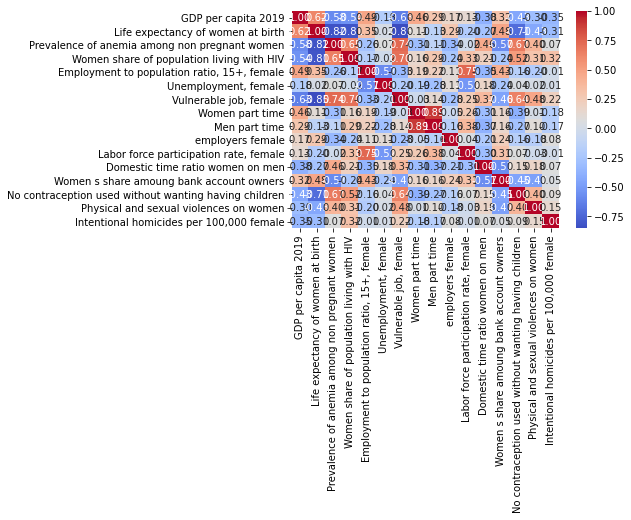

In [71]:
sns.heatmap(df_final.corr(), cmap='coolwarm', annot=True, fmt=".2f")